# Imports

In [1]:
import random
import palettable
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly.graph_objs import *

# Load

## Topic Assignments

In [2]:
df = pd.read_csv('../../results/pd_topics_5.csv', header=None)

In [3]:
df.columns = ['tokenized_description', 'topic']

In [4]:
df = df[df['tokenized_description'] != '[]']

Count number of purchase orders by topic.

In [5]:
topics = pd.DataFrame({'count' : df.groupby('topic')['topic'].count()}).reset_index()

## Topic Definitions

In [6]:
df = pd.read_csv('../../results/topics_definitions_5.csv', header=None)

In [7]:
df.columns = ['topic', 'words']

Top 10 words only.

In [8]:
df['words'] = df['words'].apply(lambda x: ', '.join(x.split()[:10]))

## Merge

In [9]:
df = pd.merge(topics, df, on='topic')

# Bar Plots

## Colors

In [10]:
palette = palettable.colorbrewer.qualitative.Accent_8.hex_colors + \
          palettable.colorbrewer.qualitative.Dark2_6.hex_colors

random.seed(18675309)
random.shuffle(palette)

In [11]:
data = Data([
    Bar(
        x=df['topic'].tolist(),
        y=df['count'].tolist(),
        text=df['words'].tolist(),
        textfont=Font(
            family='Times new roman'
    ),
        marker=Marker(
            color=palette
        ),
        line=Line(
                color='white',
                width= 1.0
            )
    )
])

layout = Layout(
    title='Purchase Orders per Topic',
    font=Font(
        family='Times new roman'
    ),
    showlegend=False
)

fig = Figure(data=data, layout=layout)

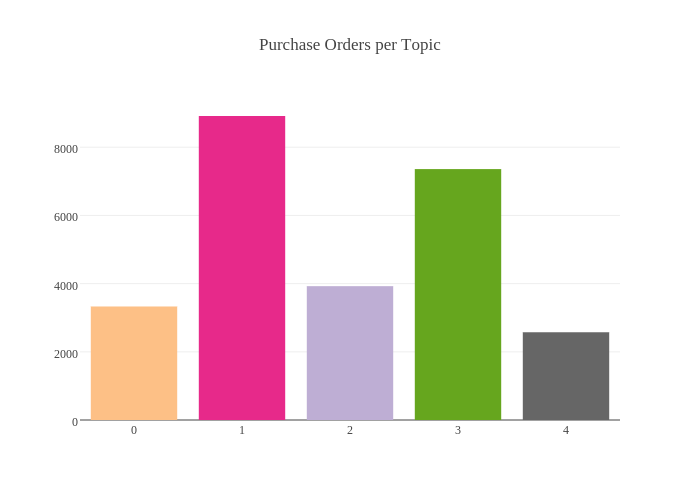

In [12]:
py.iplot(fig, filename = 'topic5')

In [13]:
"""%matplotlib inline

with sns.axes_style("darkgrid"):
#     plt.subplots(figsize=(8, 6))
    plt.rc('savefig', dpi=100)
    sns.barplot(x='topic', y='count', data=topics,
                palette=palettable.colorbrewer.qualitative.Set3_10.mpl_colors)"""

'%matplotlib inline\n\nwith sns.axes_style("darkgrid"):\n#     plt.subplots(figsize=(8, 6))\n    plt.rc(\'savefig\', dpi=100)\n    sns.barplot(x=\'topic\', y=\'count\', data=topics,\n                palette=palettable.colorbrewer.qualitative.Set3_10.mpl_colors)'